# **Capstone II Modeling**

In this section of the data science method we finally apply machine learning models to answer our original question: 

Of the tracked attributes (features) in our dataset, which are the top two best predictors of heart disease? 

While we work to answer this question, we will use a machine learning (ML) model to model our data. This is useful on its own, as it allows us to predict whether someone has heart disease based on the values they have for the features of our data set. There is a large variety of ML models available to use through scikit-learn's API. All have their strengths and weaknesses, and most will only work with certain kinds of data. Your data set, the nature of your data and the variable you're trying to predict, matters greatly for which ML model or models you should try and use. Thus, we feel it is appropriate to give a short justification for which models we will attempt to use for our data set and for our present goals.

In selecting appropriate ML models we consider the following hierarchy.

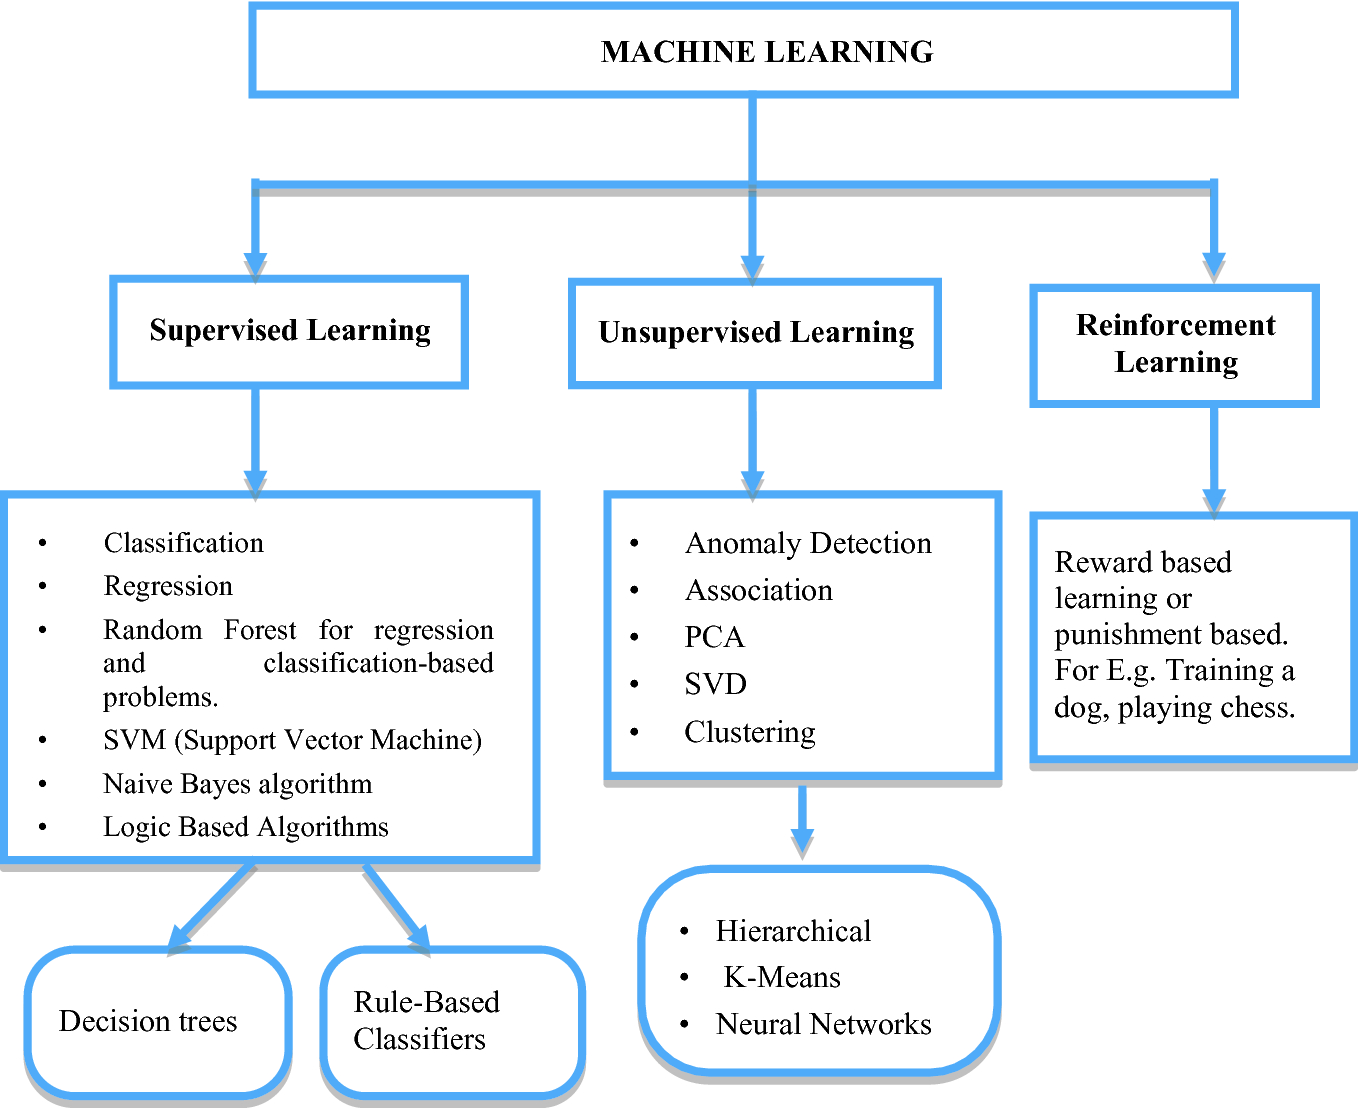

Firstly, our problem is a supervised learning problem. We already know what we're trying to predict (heart disease yes or no) and have the appropriate labels for this target variable. Therefore, we choose from the ML models in the supervised learning category. Secondly, our problem is a problem of classification, since the variable we're trying to predict, the presence of heart disease, is a categorical variable (yes or no). We are not trying to predict something continuous like height or weight, which can be anything from a continuous range of numbers. Therefore, we select classification models from the supervised learning tree. 

In the preprocessing stage of our capstone we OneHot encoded all our non-numeric variables specifically to prepare for using a Logistic Regression ML model, which is a derivative of the Linear Regression ML family adapted specifically for predicting categorical outcomes. We will also use a random forest of decision tree models, which is an ensemble method for classification. We feel decision trees are a good point of comparison to other ML models because they're simpler to explain. Both of these models are classification models, and so are suitable for our purposes.

And since we have two datasets, we'll just model first one, then the other.

### ** 1.0 General Imports, Loading Data**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_scaled_df = pd.read_csv('../Data/full_train.csv')
test_scaled_df = pd.read_csv('../Data/full_test.csv')

In [3]:
train_scaled_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,0.247343,1.274860,1.873925,1.844952,0.550076,1.917754,-0.526262,0.526262,0.933774,-0.480815,...,-0.231692,-0.517231,0.824443,-0.489972,-1.194806,1.194806,-0.267886,1.004376,-0.877849,1
1,0.247343,1.274860,-0.358808,-0.542020,-1.478661,-0.830849,-0.526262,0.526262,-1.070922,-0.480815,...,-0.231692,-0.517231,-1.212940,2.040934,0.836956,-0.836956,-0.267886,1.004376,-0.877849,1
2,0.566351,0.990832,-0.565195,1.844952,0.828530,0.635073,-0.526262,0.526262,-1.070922,-0.480815,...,-0.231692,-0.517231,0.824443,-0.489972,0.836956,-0.836956,-0.267886,-0.995643,1.139148,0
3,-0.284337,-0.145280,-1.184356,-0.542020,-1.438882,-0.830849,-0.526262,0.526262,0.933774,-0.480815,...,-0.231692,-0.517231,0.824443,-0.489972,0.836956,-0.836956,-0.267886,-0.995643,1.139148,0
4,0.353679,-0.145280,1.236001,-0.542020,-1.518441,0.085352,1.900194,-1.900194,-1.070922,-0.480815,...,4.316083,-0.517231,0.824443,-0.489972,0.836956,-0.836956,-0.267886,1.004376,-0.877849,0


In [4]:
test_scaled_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-0.922353,-0.145280,-0.152421,-0.542020,1.544555,-0.281128,1.900194,-1.900194,-1.070922,2.079803,...,-0.231692,1.933373,-1.212940,-0.489972,0.836956,-0.836956,-0.267886,1.004376,-0.877849,0
1,-0.071665,0.706804,5.176118,-0.542020,-0.245507,-0.830849,-0.526262,0.526262,-1.070922,-0.480815,...,-0.231692,-0.517231,0.824443,-0.489972,0.836956,-0.836956,-0.267886,1.004376,-0.877849,1
2,1.204367,1.558888,-0.358808,1.844952,-0.563741,0.268592,-0.526262,0.526262,0.933774,-0.480815,...,-0.231692,-0.517231,-1.212940,2.040934,0.836956,-0.836956,-0.267886,1.004376,-0.877849,1
3,0.885359,0.025137,-0.358808,1.844952,-0.683078,0.268592,-0.526262,0.526262,-1.070922,-0.480815,...,-0.231692,-0.517231,-1.212940,2.040934,-1.194806,1.194806,-0.267886,1.004376,-0.877849,1
4,0.034671,-1.395003,1.254763,-0.542020,0.788751,-0.830849,-0.526262,0.526262,-1.070922,2.079803,...,-0.231692,-0.517231,0.824443,-0.489972,0.836956,-0.836956,-0.267886,-0.995643,1.139148,0


In [5]:
X_train = train_scaled_df.drop(columns = 'HeartDisease').to_numpy()
y_train = np.ravel(train_scaled_df[['HeartDisease']].to_numpy())
X_test = test_scaled_df.drop(columns = 'HeartDisease').to_numpy()
y_test = np.ravel(test_scaled_df[['HeartDisease']].to_numpy())

## **2.0 Model Selection**

### **2.1 Logistic Regression**

In [6]:
# first we try logistic regression out of the box with no hyperparameter tuning
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred_no_tuning = logreg.predict(X_test)

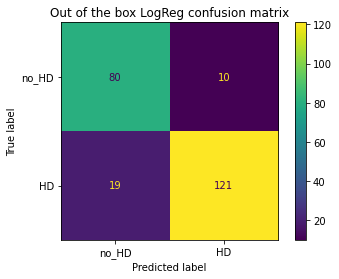

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

target_names = ['no_HD', 'HD']
cm = confusion_matrix(y_test, logreg_pred_no_tuning)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = target_names)
disp.plot()
plt.title('Out of the box LogReg confusion matrix')

plt.show()

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg_pred_no_tuning, target_names=target_names))

              precision    recall  f1-score   support

       no_HD       0.81      0.89      0.85        90
          HD       0.92      0.86      0.89       140

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.87       230



What may be the most important metric for our purposes is the recall score for the positive class (HD). This is known as "sensitivity," but is the default recall metric, so we'll just keep referring to it as recall. In certain applications, like in medicine, it is most important to have a high recall score. The smaller your recall, the more false negatives are occuring in your model relative to true positives. It is much more costly to send someone on their way with no treatment because your model predicted they don't have heart disease when they actually do than it is to run further tests or begin treating someone your model predicted does have heart disease when they actually don't. The three metrics we will consider for which model is best are accuracy, precision (again, of the positive class by default), and recall. We put the greatest importance on the recall score, for the reasons given above.

The untuned logistic regression model had an accuracy score of 87%, precision score of 92%, and a recall score of 86%. These are fairly high scores, but we will have more confidence in our model's scores if we've done some hyperparameter optimization and cross validation.

In [9]:
# we will use GridSearchCV to tune hyperparameters, as this is a small data set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, LeaveOneOut

# This list of C values, which is inverse regulatization strength, is somewhat arbitrary. We only expect that since our 
# data's values are scaled to be quite small, a smaller C value may be optimal.
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# l2 is the default penalty term, but we do provide compatible solver's to iterate through. Other penalty terms proved
# too computationally expensive to include in our gridsearch. 
param_grid = [{'C': Cs, 
               'penalty': ['l2'], 
               'solver': ['lbfgs', 'sag', 'saga', 'newton-cg', 'liblinear']}]

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=LeaveOneOut()) # Leave one out is the most rigorous cross validation k value
logreg_cv.fit(X_train, y_train)
print(logreg_cv.best_params_)

{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}


In [10]:
# A C value of 0.001, penalty of l2, and solver of lbfgs is best. Let's run the model again with those hyperparameters
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C = 0.001, penalty = 'l2', solver = 'lbfgs')
logreg.fit(X_train, y_train)
logreg_pred_tuned = logreg.predict(X_test)

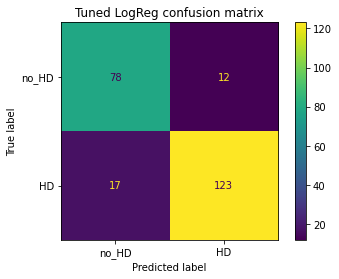

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, logreg_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = target_names)
disp.plot()
plt.title('Tuned LogReg confusion matrix')
plt.show()

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logreg_pred_tuned, target_names=target_names))

              precision    recall  f1-score   support

       no_HD       0.82      0.87      0.84        90
          HD       0.91      0.88      0.89       140

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230



The accuracy score for our tuned logistic regression model happens to be 87% as well. Precision dropped to 91%, but recall has increased from 86% to 88%. This is a favorable tradeoff!  

Now we compare these results to a random forest of decision trees.

### **2.2 Random Forest Decision Tree**

In [13]:
# First, an out of the box test run.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
rf_pred_no_tuning = rf.predict(X_test)

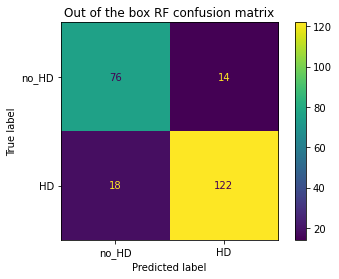

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_pred_no_tuning)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = target_names)
disp.plot()
plt.title('Out of the box RF confusion matrix')

plt.show()

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred_no_tuning, target_names=target_names))

              precision    recall  f1-score   support

       no_HD       0.81      0.84      0.83        90
          HD       0.90      0.87      0.88       140

    accuracy                           0.86       230
   macro avg       0.85      0.86      0.86       230
weighted avg       0.86      0.86      0.86       230



The out of the box random forest of decision trees has performed slightly worse than the logistic regression model with an accuracy score of 86%, precision score of 90%, and recall of 87%. Let's attempt some tuning.

In [16]:
# Optimize rf hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [50, 100, 300, 500], 
               'criterion': ['gini', 'entropy'], 
               'max_depth': [4,5,6,7,8,10,15,20]}]

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf, param_grid, cv=5) #dropped down to 5 fold CV due to computation time
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300}


In [17]:
# We have our hyperparameters. Let's run the RF again
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini', max_depth = 20, n_estimators = 300, random_state = 42)
rf.fit(X_train, y_train)
rf_pred_tuned = rf.predict(X_test)

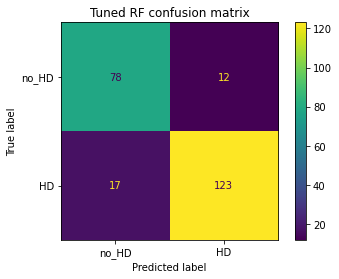

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = target_names)
disp.plot()
plt.title('Tuned RF confusion matrix')

plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred_tuned, target_names=target_names))

              precision    recall  f1-score   support

       no_HD       0.82      0.87      0.84        90
          HD       0.91      0.88      0.89       140

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230



After tuning hyperparameters with the results of our GridSearchCV our RF of decision trees model improves its accuracy to 87%. The precision and recall scores have also improved to 91% and 88%, respectively.

### **2.3 Model Comparison**

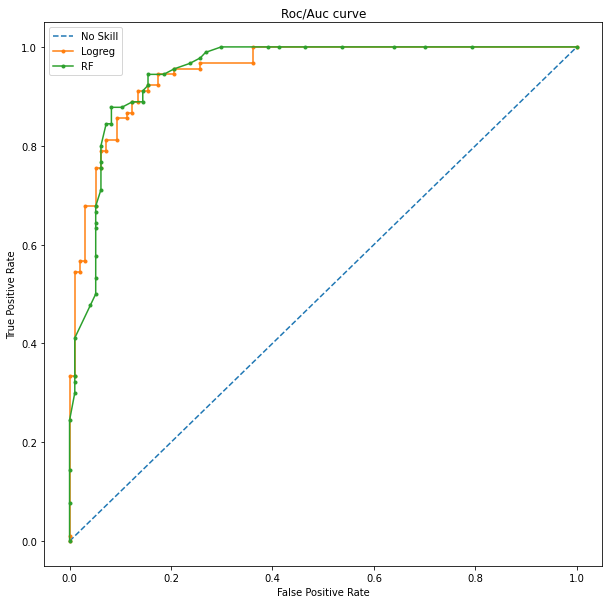

In [38]:
# Examine the roc curve of the two models
from sklearn.metrics import roc_curve

# Each yhat array is 187 entries long. Each entry in the array is the probability that each record in the X_test
# set belongs to the positive class (heart disease)
yhatlr = logreg.predict_proba(X_test)
yhatrf = rf.predict_proba(X_test)

# We just need the dimension of the arrays that have the probabilities (all the rows of the second column)
yhatlr = yhatlr[:, 1]
yhatrf = yhatrf[:, 1]

# Calculate roc curves for both models
fprlr, tprlr, thresholdslr = roc_curve(y_test, yhatlr)
fprrf, tprrf, thresholdsrf = roc_curve(y_test, yhatrf)

# Plot the roc curve for both models
plt.figure(figsize=(10,10))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill') #essentially the coin flip line - pure 50% chance of TP or FP
plt.plot(fprlr, tprlr, marker='.', label='Logreg')
plt.plot(fprrf, tprrf, marker='.', label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc/Auc curve')
plt.legend()
plt.show()

In [21]:
# Now check out the roc/auc score for both models. This is the area under each curve
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, yhatlr).round(2)
rf_auc = roc_auc_score(y_test, yhatrf).round(2)
lr_auc, rf_auc

(0.93, 0.93)

In [22]:
# Create table to compare the scores of the two tuned models.
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_auc_score

lr_auc = roc_auc_score(y_test, yhatlr).round(2)
rf_auc = roc_auc_score(y_test, yhatrf).round(2)

logreg_pre = precision_score(y_test, logreg_pred_tuned).round(2)
logreg_rec = recall_score(y_test, logreg_pred_tuned).round(2)
logreg_acc = accuracy_score(y_test, logreg_pred_tuned).round(2)

rf_pre = precision_score(y_test, rf_pred_tuned).round(2)
rf_rec = recall_score(y_test, rf_pred_tuned).round(2)
rf_acc = accuracy_score(y_test, rf_pred_tuned).round(2)

index = ['Tuned_LogReg', 'Tuned_RF']
data = {'Precision': [logreg_pre, rf_pre], 'Recall': [logreg_rec, rf_rec], 
        'Accuracy': [logreg_acc, rf_acc], 'Roc/Auc score': [lr_auc, rf_auc]}

score_comparison = pd.DataFrame(data = data, index = index)
score_comparison

,Precision,Recall,Accuracy,Roc/Auc score
Tuned_LogReg,0.91,0.88,0.87,0.93
Tuned_RF,0.91,0.88,0.87,0.93


The models have performed exactly the same as each other. In the absence of a clear score difference, we'll select the simpler model to draw our insights from. This would be random forest.

## **3.0 Model Insights**

Now that we have selected our model, it's time to answer the questions we set out to answer in our problem identification step.

Of the tracked attributes in our dataset, which are the top two best predictors of heart disease? 

In [23]:
# Get feature importances from random forest model object
feature_importance = rf.feature_importances_

# Get a sorted list of feature importance indicies, ascending. 
sorted_idx = np.argsort(feature_importance)

# Make two lists that correspond to each other: sorted feature names and sorted feature importances 
sorted_feature_names = []
for i in sorted_idx:
    sorted_feature_names.append(train_scaled_df.drop(columns = 'HeartDisease').columns[i])

sorted_feature_importances = []
for i in sorted_idx:
    sorted_feature_importances.append(feature_importance[i])

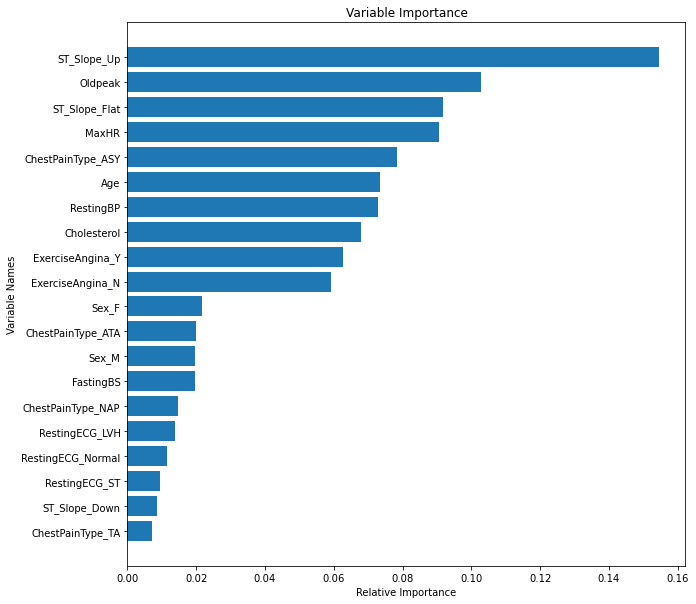

In [24]:
# Plot the relative feature importances to see the best predictors of heart disease
plt.figure(figsize=(10,10))
plt.barh(y = sorted_feature_names, width = sorted_feature_importances)
plt.xlabel('Relative Importance')
plt.ylabel('Variable Names')
plt.title('Variable Importance')
plt.show()

Our question is answered! Of the features in our data set, st_slope_up is handily the best feature for determining whether someone has heart disease. The next important group of features are oldpeak, ST_slope flat, max heart rate, asymptomatic chest pain, age, resting blood pressure, cholesterol, and both kinds of exercise angina. A sharpe drop in feature importance happens after exercise angina, and the remain features (notably sex) are relatively unimportant.

Now we'll run the same procedures on our smaller data set.

### **4.1 Logistic Regression**

In [25]:
train_scaled_df = pd.read_csv('../Data/no_swiss_train.csv')
test_scaled_df = pd.read_csv('../Data/no_swiss_test.csv')

In [26]:
X_train = train_scaled_df.drop(columns = 'HeartDisease').to_numpy()
y_train = np.ravel(train_scaled_df[['HeartDisease']].to_numpy())
X_test = test_scaled_df.drop(columns = 'HeartDisease').to_numpy()
y_test = np.ravel(test_scaled_df[['HeartDisease']].to_numpy())

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, LeaveOneOut

Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

param_grid = [{'C': Cs, 
               'penalty': ['l2'], 
               'solver': ['lbfgs', 'sag', 'saga', 'newton-cg', 'liblinear']}]

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=LeaveOneOut())
logreg_cv.fit(X_train, y_train)
print(logreg_cv.best_params_)

{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C = 0.0001, penalty = 'l2', solver = 'liblinear')
logreg.fit(X_train, y_train)
logreg_pred_tuned = logreg.predict(X_test)

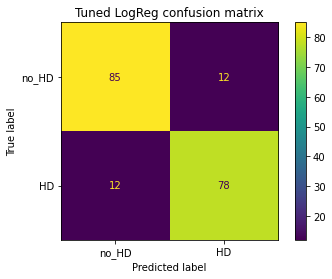

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

target_names = ['no_HD', 'HD']
cm = confusion_matrix(y_test, logreg_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = target_names)
disp.plot()
plt.title('Tuned LogReg confusion matrix')
plt.show()

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, logreg_pred_tuned, target_names=target_names))

              precision    recall  f1-score   support

       no_HD       0.88      0.88      0.88        97
          HD       0.87      0.87      0.87        90

    accuracy                           0.87       187
   macro avg       0.87      0.87      0.87       187
weighted avg       0.87      0.87      0.87       187



### **4.2 Random Forest**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [50, 100, 300, 500], 
               'criterion': ['gini', 'entropy'], 
               'max_depth': [4,5,6,7,8,10,15,20]}]

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 50}


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 50, random_state = 42)
rf.fit(X_train, y_train)
rf_pred_tuned = rf.predict(X_test)

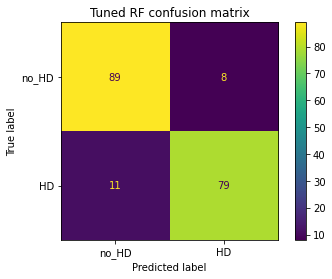

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = target_names)
disp.plot()
plt.title('Tuned RF confusion matrix')

plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred_tuned, target_names=target_names))

              precision    recall  f1-score   support

       no_HD       0.89      0.92      0.90        97
          HD       0.91      0.88      0.89        90

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [35]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

logreg_pre = precision_score(y_test, logreg_pred_tuned).round(2)
logreg_rec = recall_score(y_test, logreg_pred_tuned).round(2)
logreg_acc = accuracy_score(y_test, logreg_pred_tuned).round(2)

rf_pre = precision_score(y_test, rf_pred_tuned).round(2)
rf_rec = recall_score(y_test, rf_pred_tuned).round(2)
rf_acc = accuracy_score(y_test, rf_pred_tuned).round(2)

index = ['Tuned_LogReg', 'Tuned_RF']
data = {'Precision': [logreg_pre, rf_pre], 'Recall': [logreg_rec, rf_rec], 'Accuracy': [logreg_acc, rf_acc]}

score_comparison = pd.DataFrame(data = data, index = index)
score_comparison

,Precision,Recall,Accuracy
Tuned_LogReg,0.87,0.87,0.87
Tuned_RF,0.91,0.88,0.90


With the smaller data set random forest does much better.

In [36]:
# Get feature importances from random forest model object
feature_importance = rf.feature_importances_

# Get a sorted list of feature importance indicies, ascending. 
sorted_idx = np.argsort(feature_importance)

# Make two lists that correspond to each other: sorted feature names and sorted feature importances 
sorted_feature_names = []
for i in sorted_idx:
    sorted_feature_names.append(train_scaled_df.drop(columns = 'HeartDisease').columns[i])

sorted_feature_importances = []
for i in sorted_idx:
    sorted_feature_importances.append(feature_importance[i])

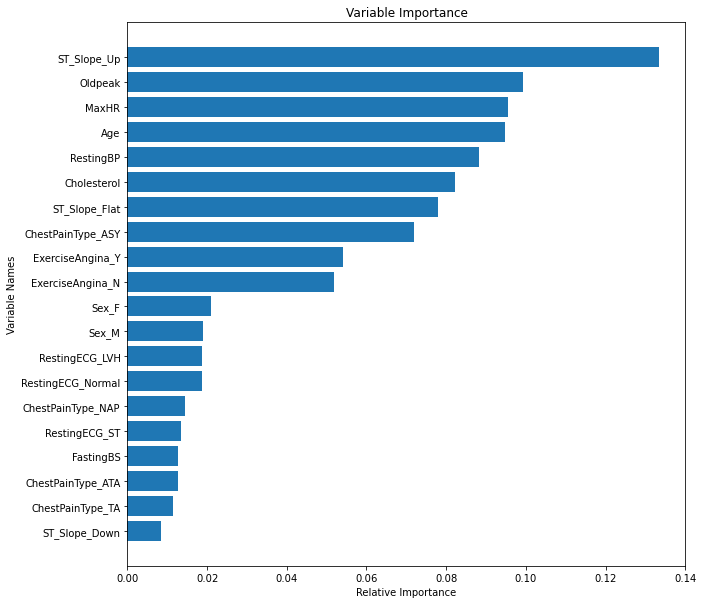

In [37]:
# Plot the relative feature importances to see the best predictors of heart disease
plt.figure(figsize=(10,10))
plt.barh(y = sorted_feature_names, width = sorted_feature_importances)
plt.xlabel('Relative Importance')
plt.ylabel('Variable Names')
plt.title('Variable Importance')
plt.show()

Once again, ST_slope up dominates the feature importance list. 

# **Summary** 

In this project we have acquired a heart disease data set from kaggle with the following features: 

- Age: The participant's age (28 to 77).

- Sex: The participant's sex (M or F).

- ChestPainType: TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic.
    Angina is a kind of chest pain, and is often described as a squeezing or pressure around the heart area. Angina can be considered atypical if it occurs less predictably and in varying degrees of pain. We take non-anginal pain to be any other kind of bodily pain that isn't obviously not related to the heart. For example, the pain of a stubbed toe does not count as non-anginal pain, but perhaps an aching thigh might. We take asymptomatic to mean the complete absence of angina or any pain that might be related to it.
    
- RestingBP: Resting blood pressure in mmHg. Ranges from 80 to 200 mmHg. Blood pressure is the pressure of circulating blood against the boundaries of blood vessels. This is most likely systolic measurements, which have a higher domain than diastolic. Normal resting BP is below 120, and anything above 130 is hypertension territory. Above 180 and you should consult a doctor immediately.

- Cholesterol: serum cholesterol (mg/dl). Cholesterol is a waxy fatty substance present in our bloodstream. It is absolutely essential for survival, being involved in things like hormone regulation, cell structure, and vitamin synthesis. It is important to note here that serum, or blood, cholesterol is not the same thing as dietary cholesterol. If serum cholesterol is found to be a risk factor for HD, it doesn't necessarily say anything about dietary cholesterol. A sample of serum cholesterol is measured in milligrams of cholesterol per deciliter of blood.

- FastingBS: Fasting blood sugar. 1 if FastingBS > 120 mg/dl, 0 otherwise. Blood sugar is the measure of glucose (in milligrams) concentrated in (1 deciliter) of blood. A fasting blood sugar level of less than 100 is normal. 100-120 is thought of as pre-diabetic levels. A person with a fasting blood sugar over 120 is diabetic.

- RestingECG: Resting electrocardiogram results. Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria. Cardiograms measure electrical impulse vs. time. 

- MaxHR: Maximum heart rate achieved. Numeric value between 60 and 202 beats per minute. A common rule of thumb for what your maximum heart rate should be (without measuring) is to subtract your age from 220. Then, our youngest participant(age 28) would have a theoretical maximum heart rate of 192, and our eldest participant (77) would have a theoretical maximum heart rate of 143.

- ExerciseAngina: exercise-induced angina. Y: Yes, N: No.

- Oldpeak: Oldpeak = ST. Numeric value measured in depression. ST depression refers to an ECG segment abnormally below the baseline. Since the oldpeak metric here is tracked in positive millimeters *below* the baseline, negative measurements must mean millimeters above the baseline. The ST segment is a portion of an ECG that occurs after the QRS complex, and before the T wave. Normally, with a healthy heart, this segment would be mostly flat on the baseline. It is when it is measured below the baseline (positive numbers in this dataset) that HD may be a concern.

- ST_Slope: The slope of the peak exercise ST segment Up: upsloping, Flat: flat, Down: downsloping. Again, this is the same portion of the ECG as in oldpeak. This feature is measuring the slope of the ST segment, rather than its position on or below the baseline. A flat or up ST_slope would be normal, as the ECG signal must increase positively to get back to the baseline from the end of the QRS segment, which is typically quite negative. 

We cleaned the data in the data wrangling section, peering into the distributions of each feature for anything alarming. The one big choice we had to make in that section was what to do with the missing cholesterol values, which, we found, all came from the portion of the data from a hospital in Switzerland. We kept two versions of the data, one with the median cholesterol value imputed for those missing values, and one with all the data from Switzerland dropped. Ultimately, if we were to base our judgments entirely around one of the data sets, I think the insights drawn from the data set with the imputed values is closer to any 'real' relationship that exists in the world between all of these features and heart disease. As we saw from our modeling section, cholesterol turned out to be pretty unimportant no matter which data set we used. Including those values, then, is helpful for the model learning about the other features since we didn't lose any data. Although, in the end, one feature dominated in importance compared to all the rest in both versions of the data.

In the exploratory data analysis section we more closely examined the relationships between each feature of our data and the target variable: heart disease. In a simple correlation matrix no variable had a pearson correlation coefficient higher than 0.55, which was, curiously, flat ST slope. 

In our modeling section we found that ST slope UP is by far the best predictor of heart disease with our (tied for) best scoring model, the random forest ensemble method. 

Certainly more work is needed to investigate the explanation for why ST slope flat could occur in the highest numbers with heart disease havers, yet ST slope up be the best predictor of heart disease as determined by a ML algorithm. We would also like to see if anything would change if dietary cholesterol were an included feature of the data set. More data from other parts of the world would be interesting. Or perhaps a by region analysis, since diets and lifestyle habits vary so much in different parts of the world. 